In [1]:
%matplotlib notebook
import numpy as np
import math
from scipy.special import roots_legendre
import matplotlib.pyplot as plt
import random
import time
from numpy import linalg as LA

# Prob. 1

## (a)

In [2]:
N = 100
DELTA_X = (10-0.5)/(N-1)

def func(x):
    return np.sin(x-x**2)/x

def create_func_noisy(lamda,N):
    x_list = np.linspace(0.5, 10, N)
    f_list = np.zeros(N)
    fn_list = np.zeros(N)
    for i in range(N):
        f_list[i] = func(x_list[i])
        fn_list[i] = f_list[i] + lamda *random.uniform(-1.0,1.0)
    return x_list, f_list, fn_list

<IPython.core.display.Javascript object>


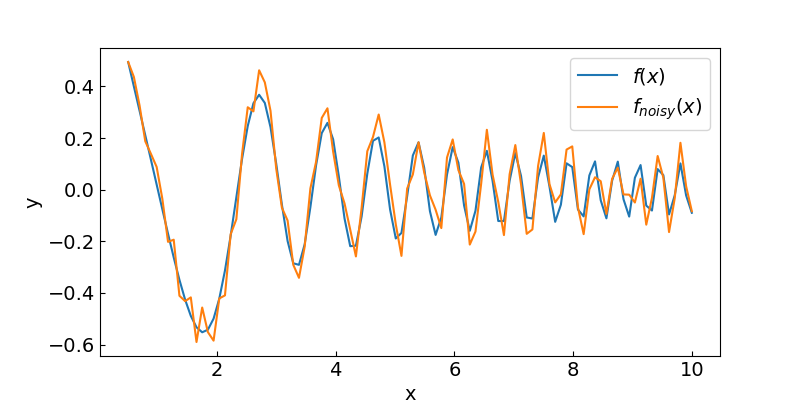

In [3]:
x_list, f_list, fn_list = create_func_noisy(0.1,N)

fig = plt.figure(figsize=(8, 4))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams.update({'font.size': 14})

plt.plot(x_list,f_list,label=r"$f(x)$")
plt.plot(x_list,fn_list,label=r"$f_{noisy}(x)$")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## (b)

In [4]:
def create_derivative_list(x_list,y_list):
    x_p_list = x_list[0:-1]
    y_p_list = np.zeros(N-1)
    for i in range(N-1):
        y_p_list[i] = (y_list[i+1]-y_list[i])/DELTA_X
    return x_p_list, y_p_list

x_table = np.zeros([3,N])
f_table = np.zeros([3,N])
fn_table = np.zeros([3,N])
lamda_list = np.array([0.1,0.3,0.6])
for i in range(3):
    x_table[i], f_table[i], fn_table[i] = create_func_noisy(lamda_list[i],N)

x_p_table = np.zeros([3,N-1])
f_p_table = np.zeros([3,N-1])
fn_p_table = np.zeros([3,N-1])

for i in range(3):
    x_p_table[i],f_p_table[i] = create_derivative_list(x_table[i],f_table[i])
    temp, fn_p_table[i] = create_derivative_list(x_table[i],fn_table[i])

<IPython.core.display.Javascript object>


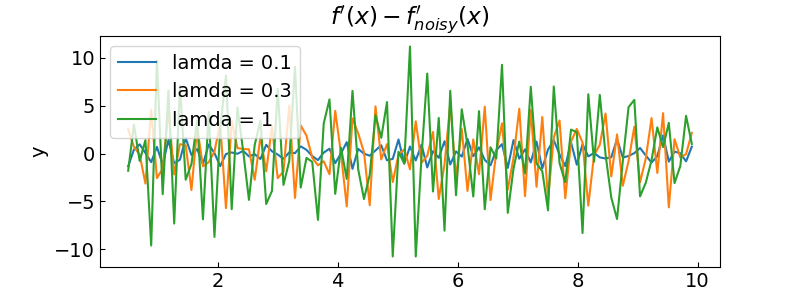

In [5]:
fig = plt.figure(figsize=(8, 3))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams.update({'font.size': 14})

plt.title(r"$f^\prime(x)-f^\prime_{noisy}(x)$")
plt.plot(x_p_table[0],f_p_table[0]-fn_p_table[0],label='lamda = 0.1')
plt.plot(x_p_table[1],f_p_table[1]-fn_p_table[1],label='lamda = 0.3')
plt.plot(x_p_table[2],f_p_table[2]-fn_p_table[2],label='lamda = 1')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Comment: The noise of the fist derivative is positive related with lamda.

## （c）

In [6]:
def cubic_spline(x_list,y_list,y_p_list):
    y_pp_list = np.zeros(N)
    for i in np.arange(1,N-1):
        y_pp_list[i] = (y_p_list[i]-y_p_list[i-1])/DELTA_X
    
    alphaa_list = np.zeros(N-1)
    beta_list = np.zeros(N-1)
    gamma_list = np.zeros(N-1)
    eta_list = np.zeros(N-1)
    
    for i in range(N-1):
        alphaa_list[i] = y_pp_list[i+1]/(6.0*DELTA_X)
        beta_list[i] = -y_pp_list[i]/(6.0*DELTA_X)
        gamma_list[i] = (-y_pp_list[i+1]*DELTA_X**2 + 6*y_list[i+1])/(6.0*DELTA_X)
        eta_list[i] = (y_pp_list[i]*DELTA_X**2 - 6*y_list[i])/(6.0*DELTA_X)
    return alphaa_list, beta_list, gamma_list, eta_list

In [7]:
cub_spl_p_table = np.zeros([3,N-1])
for i in range(3):
    temp, beta_list, gamma_list, eta_list = cubic_spline(x_table[i],fn_table[i],fn_table[i])
    for j in range(N-1):
        cub_spl_p_table[i][j] = 3*beta_list[j]*DELTA_X**2 + gamma_list[j] + eta_list[j]

<IPython.core.display.Javascript object>


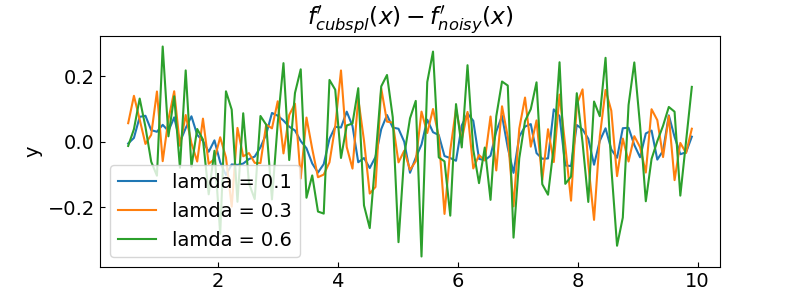

In [8]:
fig = plt.figure(figsize=(8, 3))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams.update({'font.size': 14})

plt.title(r"$f^\prime_{cub spl}(x)-f^\prime_{noisy}(x)$")
plt.plot(x_p_table[0],cub_spl_p_table[0]-fn_p_table[0],label='lamda = 0.1')
plt.plot(x_p_table[1],cub_spl_p_table[1]-fn_p_table[1],label='lamda = 0.3')
plt.plot(x_p_table[2],cub_spl_p_table[2]-fn_p_table[2],label='lamda = 0.6')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Comment: The noise of the fist derivative is positive related with lamda. However, the noise is much lower than numerical derivatie in (b).

# Prob. 2

In [9]:
def Bisection(guess_x_l,guess_x_u,epsilon):
    time_start = time.time()
    
    if func(guess_x_l)*func(guess_x_u) >=0:
        print("Change initial guesses")
        return
    
    x_l = guess_x_l
    x_u = guess_x_u
    
    while abs(func(x_l)*func(x_u)) > epsilon:
        x_r = (x_l + x_u)/2.0
        if func(x_l)*func(x_r) < 0:
            x_u = x_r
        elif func(x_l)*func(x_r) > 0:
            x_l = x_r
            
    time_stop = time.time()
    return x_r, time_stop-time_start


def N_R_Algorithm(guess_x,epsilon,N_max):
    time_start = time.time()
    if func(guess_x+epsilon)-func(guess_x-epsilon) == 0:
        print("change a guess root")
        return
    x = guess_x
    for i in range(N_max):
        derivative = (func(x+epsilon)-func(x-epsilon))/(2.0*epsilon)
        delta = func(x)/derivative
        x = x - delta
        if abs(delta)< epsilon*abs(x) or abs(delta)< epsilon:
            time_stop = time.time()
            return x, time_stop-time_start
    
    print('N_max is not enough.')
    return


def Secant_method(guess_x1,guess_x2,epsilon,N_max):
    time_start = time.time()
    if func(guess_x1)-func(guess_x2) == 0:
        print("change a guess root")
        return
    
    x1 = guess_x1
    x2 = guess_x2
    for i in range(N_max):
        #derivative = (func(guess_x+epsilon)-func(guess_x-epsilon))/(2.0*epsilon)
        delta = (func(x2)*(x1-x2))/(func(x1)-func(x2))
        x1 = x2
        x2 = x2 - delta
        if abs(delta)< epsilon*abs(x2) or abs(delta)< epsilon:
            time_stop = time.time()
            return x2, time_stop-time_start
    
    print('N_max is not enough.')
    return

In [10]:
root_1, time_1 = N_R_Algorithm(1.5,1e-10,500)
root_2, time_2 = Bisection(0.5,2,1e-20)
root_3, time_3 = Secant_method(1.5,1.6,1e-10,500)

print('root\ttime consume')
print(root_1,'\t',time_1)
print(root_2,'\t',time_2)
print(root_3,'\t',time_3)

root	time consume
1.0 	 0.0
1.0000000000582077 	 0.0010001659393310547
1.0 	 0.0


Comment: The computiaion speed is too fast to observe speed difference between these 3 method. However, theoretical speaking, Newton-Raphson Method is faster than Bisection method. Their time complexity are O(n) and O(log(n)),separately.

# Prob.3

## (a)

In [12]:
x = [[[3,1],[-1,-2],[-1,1]]]
v = [[[0,0],[0,0],[0,0]]]
delta_t = [0.2]
time = [0.0]
m = [150,200,250]

EPSILON = 1e-5
t_ini = 0.0
t_fin = 2.0


def dvdt(x):
    x= np.array(x)
    G = 1
    m0 = 150
    m1 = 200
    m2 = 250
    
    d01 = max(np.sqrt((x[0][0]-x[1][0])**2 + (x[0][1]-x[1][1])**2),1e-3)
    d02 = max(np.sqrt((x[0][0]-x[2][0])**2 + (x[0][1]-x[2][1])**2),1e-3)
    d12 = max(np.sqrt((x[1][0]-x[2][0])**2 + (x[1][1]-x[2][1])**2),1e-3)
    
    dvdt0 = G*m1*(x[1]-x[0])/d01**3 + G*m2*(x[2]-x[0])/d02**3 
    dvdt1 = G*m0*(x[0]-x[1])/d01**3 + G*m2*(x[2]-x[1])/d12**3
    dvdt2 = G*m0*(x[0]-x[2])/d02**3 + G*m1*(x[1]-x[2])/d12**3 
    
    result = np.array([dvdt0,dvdt1,dvdt2])
    
    return result


def rk4(x0,v0,t_final,delta_t):
    x0 = np.array(x0)
    v0 = np.array(v0)
    
    n_time = int(np.ceil(t_final/delta_t))
    
    for i in range(n_time):
        # k1
        x_k1 = v0 * delta_t
        v_k1 = dvdt(x0) * delta_t
        x_mid = x0 + 0.5*x_k1
        v_mid = v0 + 0.5*v_k1
        
        # k2
        x_k2 = v_mid * delta_t
        v_k2 = dvdt(x_mid) * delta_t
        x_mid = x0 + 0.5*x_k2
        v_mid = v0 + 0.5*v_k2
        
        # k3
        x_k3 = v_mid * delta_t
        v_k3 = dvdt(x_mid) * delta_t
        x_mid = x0 + x_k3
        v_mid = v0 + v_k3
        
        # k4
        x_k4 = v_mid * delta_t
        v_k4 = dvdt(x_mid) * delta_t
        
        x_result = x0 + (1.0/6.0) * (x_k1 + 2.0*x_k2 + 2.0*x_k3 + x_k4)
        v_result = v0 + (1.0/6.0) * (v_k1 + 2.0*v_k2 + 2.0*v_k3 + v_k4)
        
    return x_result, v_result


def adapt_rk4(x,v,delta_t,time,t_final,des_error):
    tol=des_error*1.0e-2
    delta_t_p = delta_t[-1]
    while time[-1]<t_final:
        error = des_error + 2.0*tol
        while np.abs(error-des_error) > tol:
            x_dt,v_dt = rk4(x[-1],v[-1],2*delta_t_p,delta_t_p)
            x_2dt,v_2dt = rk4(x[-1],v[-1],2*delta_t_p,2*delta_t_p)
            error = (1.0/30.0) * np.abs(LA.norm(x_dt)-LA.norm(x_2dt))
            delta_t_p = delta_t_p * np.power((des_error/error),(1.0/5.0))
    
        x.append(x_dt)
        v.append(v_dt)
        delta_t.append(delta_t_p)
        time.append(time[-1]+2*delta_t_p)

    return x,v,delta_t, time

In [13]:
x,v,delta_t,time_epoch = adapt_rk4(x,v,delta_t,time,1.4,EPSILON)

In [14]:
x = np.array(x)
time = np.array(time)
pos_0_x = np.array(x[:,0,0])
pos_0_y = np.array(x[:,0,1])
pos_1_x = np.array(x[:,1,0])
pos_1_y = np.array(x[:,1,1])
pos_2_x = np.array(x[:,2,0])
pos_2_y = np.array(x[:,2,1])

<IPython.core.display.Javascript object>


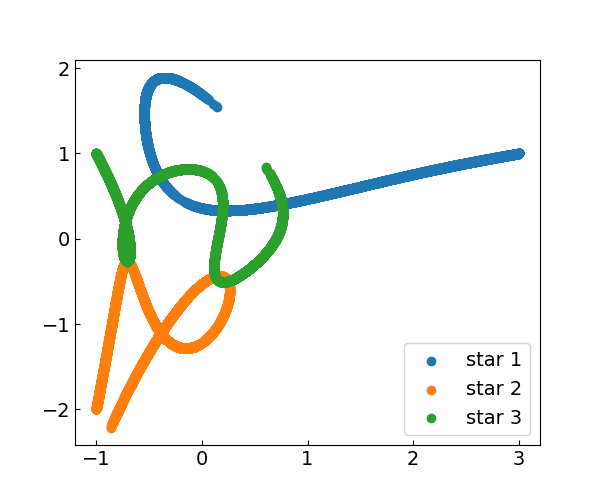

In [15]:
fig = plt.figure(figsize=(6, 5))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams.update({'font.size': 14})
plt.scatter(pos_0_x,pos_0_y,label='star 1')
plt.scatter(pos_1_x,pos_1_y,label='star 2')
plt.scatter(pos_2_x,pos_2_y,label='star 3')
plt.legend()
plt.show()

## (b)

In [16]:
x_cm = np.zeros(len(pos_0_x))
y_cm = np.zeros(len(pos_0_x))
for i in range(len(pos_0_x)):
    x_cm[i] = pos_0_x[i]*m[0] + pos_1_x[i]*m[1] + pos_2_x[i]*m[2]
    y_cm[i] = pos_0_y[i]*m[0] + pos_1_y[i]*m[1] + pos_2_y[i]*m[2]

<IPython.core.display.Javascript object>


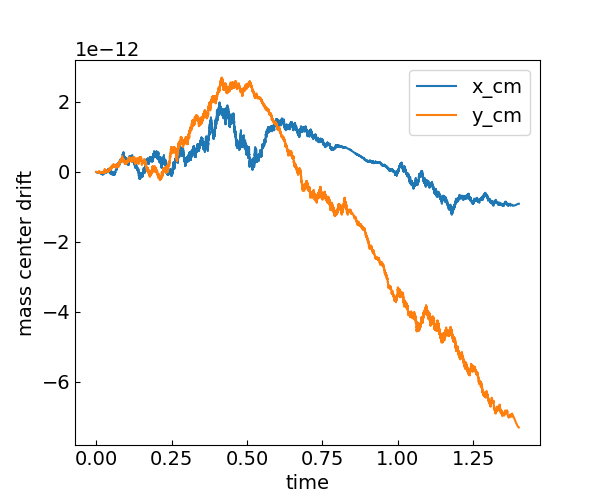

In [17]:
fig = plt.figure(figsize=(6, 5))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams.update({'font.size': 14})
plt.plot(time_epoch,x_cm,label='x_cm')
plt.plot(time_epoch,y_cm,label='y_cm')
plt.xlabel('time')
plt.ylabel('mass center drift')
plt.legend()
plt.show()